In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Chennai_avg_temp (3).csv')

In [6]:
dataset.head()

,Month_No.,Day,Year,Avg. Temp
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3
3,1,4,1995,69.7
4,1,5,1995,71.3


displaying some rows

In [7]:
dataset_mod1 = dataset[['Avg. Temp']]

In [8]:
dataset_mod1.head()

,Avg. Temp
0,71.8
1,72.0
2,70.3
3,69.7
4,71.3


In [9]:
training_set = dataset_mod1.iloc[0:365,0]

training_set

0      71.8
1      72.0
2      70.3
3      69.7
4      71.3
       ... 
360    77.4
361    78.1
362    75.6
363    76.2
364    75.9
Name: Avg. Temp, Length: 365, dtype: float64

In [10]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [11]:
training_set = training_set.values.reshape(len(training_set), 1)

In [12]:
training_set

array([[ 71.8],
       [ 72. ],
       [ 70.3],
       [ 69.7],
       [ 71.3],
       [ 73.9],
       [ 72.9],
       [ 70.2],
       [ 68.4],
       [ 68. ],
       [ 69.9],
       [ 69.8],
       [ 71. ],
       [ 73.9],
       [ 73.4],
       [ 70.4],
       [ 74.9],
       [ 74.5],
       [ 73. ],
       [ 71.9],
       [ 71.3],
       [ 73.3],
       [ 71.4],
       [ 71.3],
       [ 70.2],
       [ 73. ],
       [ 73.8],
       [ 77.5],
       [ 76.8],
       [ 76.1],
       [ 78.3],
       [ 78.9],
       [ 78.3],
       [ 73.3],
       [ 74.7],
       [ 77.3],
       [ 80.2],
       [ 83.2],
       [ 81. ],
       [ 78.8],
       [ 77.8],
       [ 76.8],
       [ 75.9],
       [ 75.7],
       [ 74.1],
       [ 73.4],
       [ 74.5],
       [ 75.3],
       [ 72.3],
       [ 73.1],
       [ 76.9],
       [ 77.9],
       [ 74.6],
       [ 76.2],
       [ 72.3],
       [ 76.1],
       [ 76.2],
       [ 75.3],
       [ 73.9],
       [ 74.2],
       [ 77.1],
       [ 79.6],
       [

In [13]:
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[0.90322581],
       [0.90428345],
       [0.8952935 ],
       [0.89212057],
       [0.9005817 ],
       [0.91433104],
       [0.90904283],
       [0.89476467],
       [0.8852459 ],
       [0.88313062],
       [0.89317821],
       [0.89264939],
       [0.89899524],
       [0.91433104],
       [0.91168694],
       [0.89582232],
       [0.91961925],
       [0.91750397],
       [0.90957166],
       [0.90375463],
       [0.9005817 ],
       [0.91115812],
       [0.90111052],
       [0.9005817 ],
       [0.89476467],
       [0.90957166],
       [0.91380222],
       [0.93336859],
       [0.92966684],
       [0.9259651 ],
       [0.93759915],
       [0.94077208],
       [0.93759915],
       [0.91115812],
       [0.91856161],
       [0.93231095],
       [0.94764675],
       [0.96351137],
       [0.95187731],
       [0.94024326],
       [0.93495505],
       [0.92966684],
       [0.92490746],
       [0.92384981],
       [0.91538868],
       [0.91168694],
       [0.91750397],
       [0.921

In [16]:
x_train = []
y_train = []
n_future = 4 # next 4 days temperature forecast
n_past = 30 # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [17]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

Using TensorFlow backend.
C:\Users\KABILAN\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KABILAN\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KABILAN\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KABILAN\anaconda\lib\site-packages\tensorflow\python\framework\dtype

In [18]:
from keras.layers import LSTM,Dense ,Dropout
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs for more info.

In [19]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True), input_shape = (x_train.shape[1],1) ) )
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
history = regressor.fit(x_train, y_train, epochs=500,batch_size=32,validation_split=0.20 )

print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])


Train on 265 samples, validate on 67 samples
Epoch 1/500
265/265 [==============================] - 5s 17ms/step - loss: 0.6031 - acc: 0.3057 - val_loss: 0.0634 - val_acc: 0.3134
Epoch 2/500
265/265 [==============================] - 1s 2ms/step - loss: 0.0866 - acc: 0.3170 - val_loss: 0.0103 - val_acc: 0.2239
Epoch 3/500
265/265 [==============================] - 1s 3ms/step - loss: 0.0465 - acc: 0.2415 - val_loss: 0.0032 - val_acc: 0.2239
Epoch 4/500
265/265 [==============================] - 1s 2ms/step - loss: 0.0396 - acc: 0.2075 - val_loss: 0.0045 - val_acc: 0.2388
Epoch 5/500
265/265 [==============================] - 1s 2ms/step - loss: 0.0329 - acc: 0.2830 - val_loss: 9.8997e-04 - val_acc: 0.2239
Epoch 6/500
265/265 [==============================] - 1s 2ms/step - loss: 0.0327 - acc: 0.2528 - val_loss: 6.9600e-04 - val_acc: 0.3134
Epoch 7/500
265/265 [==============================] - 1s 2ms/step - loss: 0.0291 - acc: 0.2679 - val_loss: 0.0013 - val_acc: 0.2388
Epoch 8/500
26

In [21]:
# read test dataset
testdataset = pd.read_csv('Chennai_avg_temp (3).csv')
#get only the temperature column
testdataset = testdataset.iloc[0:30,3:4]

In [22]:
testdataset

,Avg. Temp
0,71.8
1,72.0
2,70.3
3,69.7
4,71.3
5,73.9
6,72.9
7,70.2
8,68.4
9,68.0


In [24]:
real_temperature = pd.read_csv('Chennai_avg_temp (3).csv')
real_temperature = real_temperature.iloc[30:34,3:4]

real_temperature = real_temperature.values.reshape(len(real_temperature), 1)
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

In [25]:
real_temperature

array([[78.3],
       [78.9],
       [78.3],
       [73.3]])

In [26]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

In [27]:
predicted_temperature

array([[78.18913],
       [78.36298],
       [77.81377],
       [78.12587]], dtype=float32)

In [28]:
from matplotlib import pyplot

Trained model vs validation loss

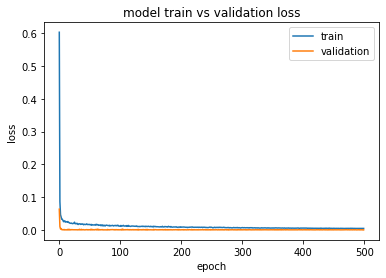

In [29]:

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Finding accuracy of the model

In [30]:
RT = real_temperature
PT = predicted_temperature

In [32]:
model_MSE= (    (   ((PT[0]-RT[0])**2) + ((PT[1]-RT[1])**2) + ((PT[2]-RT[2])**2) + ((PT[3]-RT[3])**2)    )/4 ) 

model_MSE

array([5.95652999])

Mean Square Errors(MSE) is a measure of accuracy of the model. Lower the MSE, more is the accuracy of the model